## ROOM 3 - MEMBERS

### Paul Sentongo
### Nankya Margret Peninah

## WORKFLOW
### Step 1: Data Preprocessing and Exploratory Data Analysis (EDA)
#### Load the Data
#### Explore the Data
#### Visualize the Data
#### Detect and Handle Outliers
#### Handle Missing Values
#### Feature Engineering
#### Feature Scaling
### Step 2: Model Development
#### Split the Data
#### Choose and Train a Model
#### Evaluate the Model
### Step 3: Prediction on Test Data
#### Preprocess the Test Data
#### Make Predictions
#### Save Predictions
### Step 4: Save the Model
#### Save the Model

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

In [28]:
# Load datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [29]:
# Explore data using pandas and seaborn functions
train_data.head()  # View the first few rows

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [31]:
# Check for missing values
print(train_data.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [32]:
# Check for duplicates
train_data.duplicated().sum()

0

In [33]:
# Analyze data distribution (numerical features)
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Visualize data distribution of the target variable

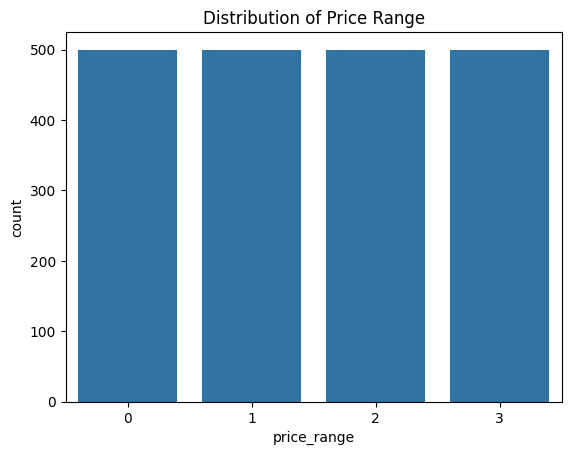

In [35]:
# Visualize the target variable distribution
sns.countplot(x='price_range', data=train_data)
plt.title('Distribution of Price Range')
plt.show()

In [37]:
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### Visualize the correlations

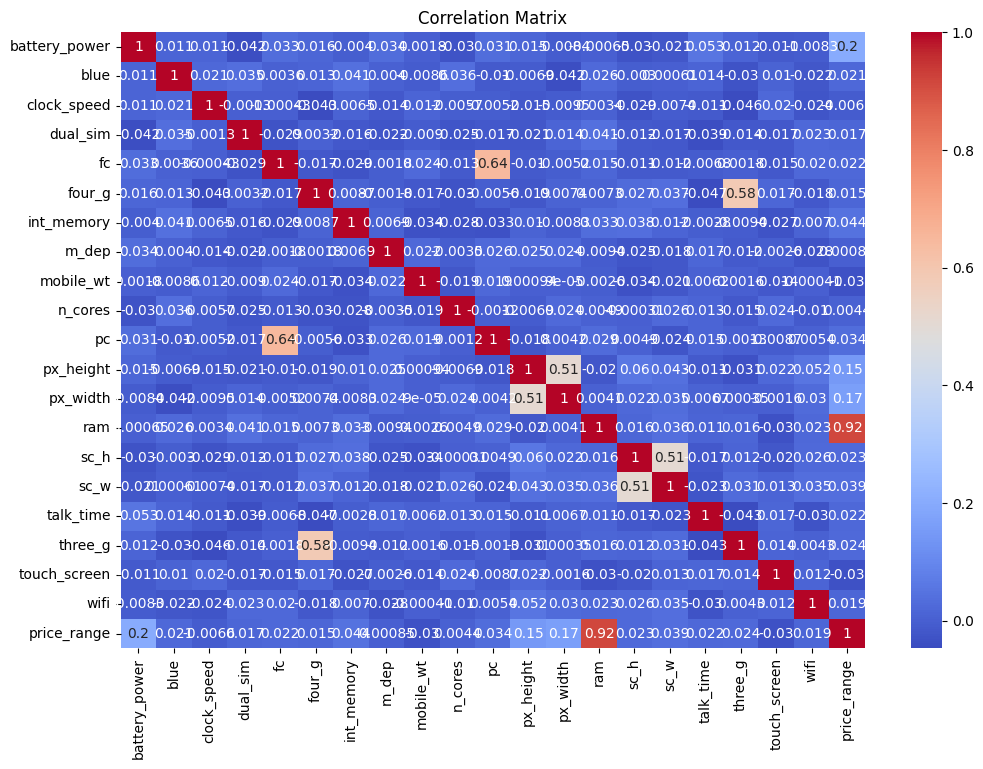

In [38]:
# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Detecting outliers using boxplots

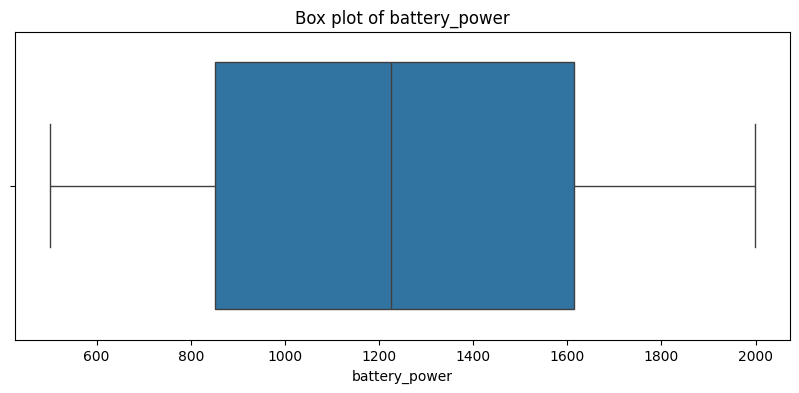

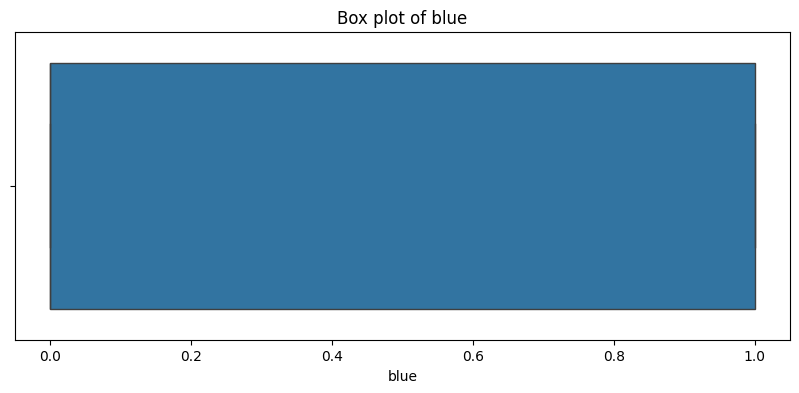

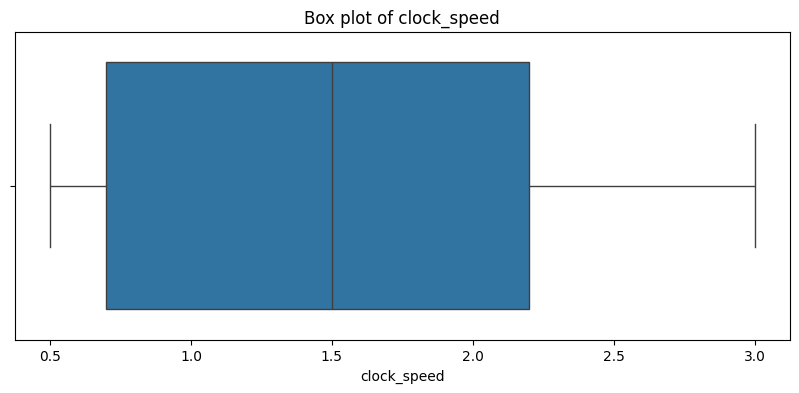

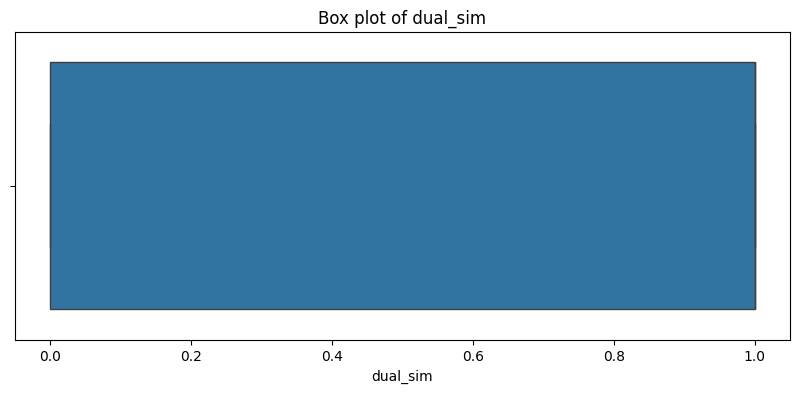

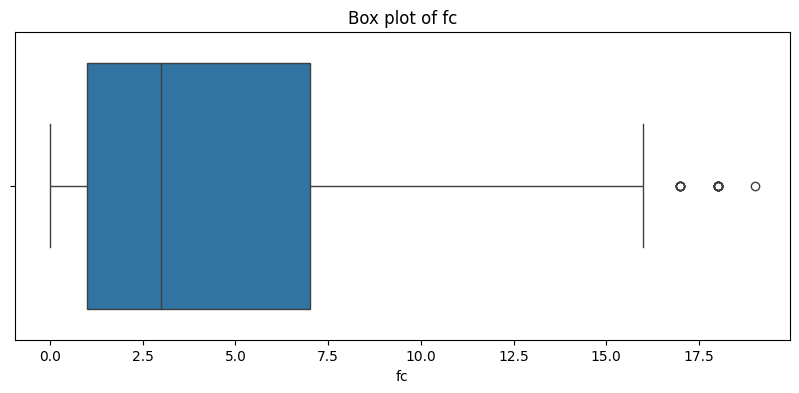

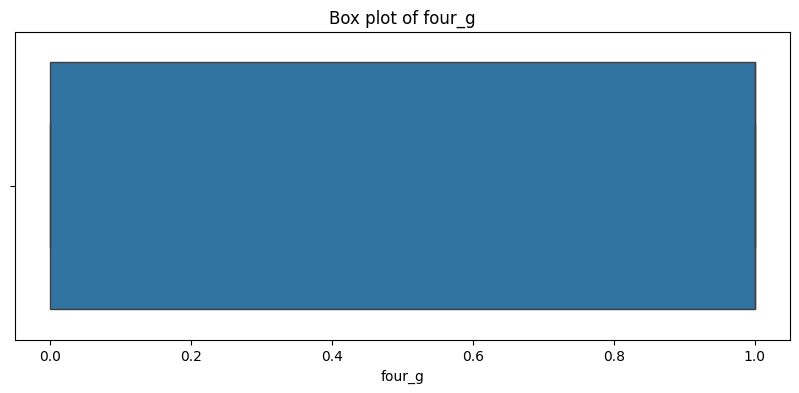

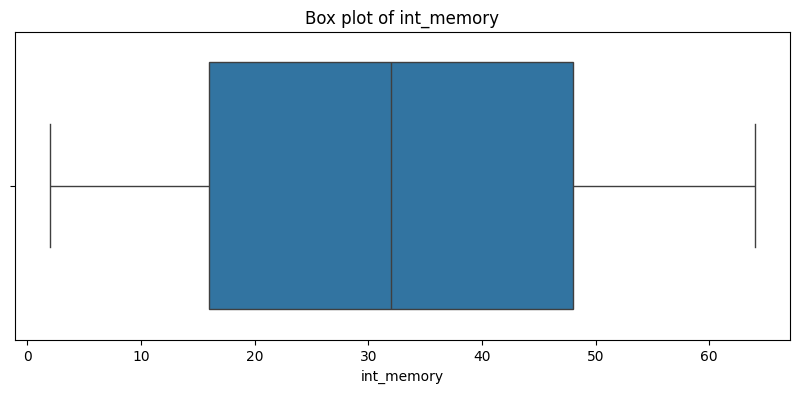

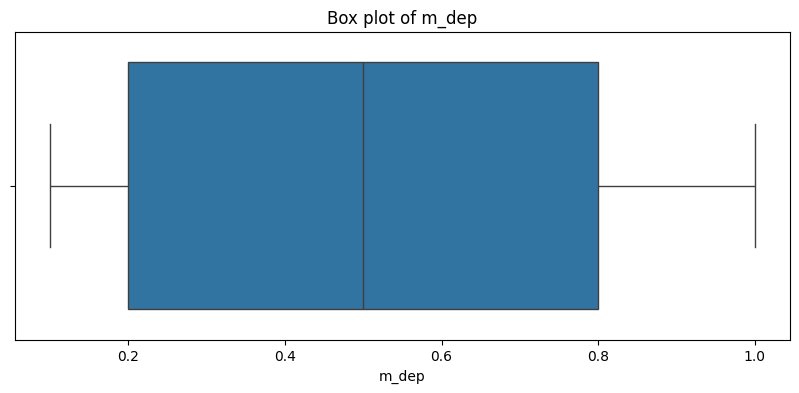

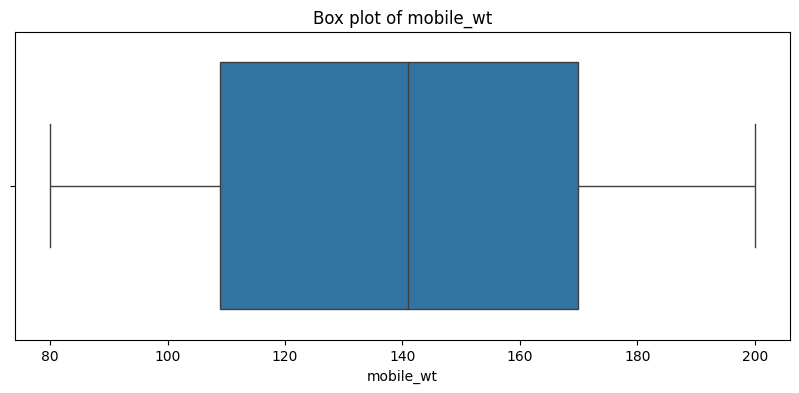

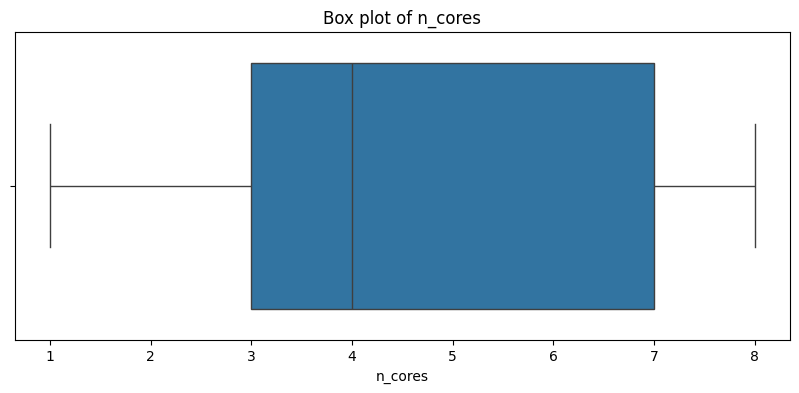

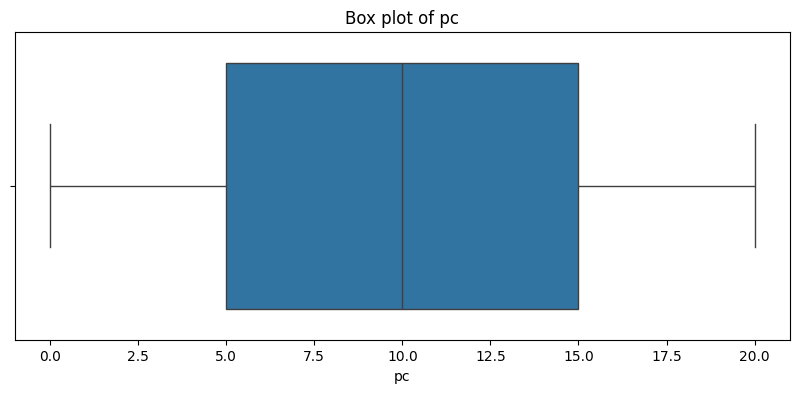

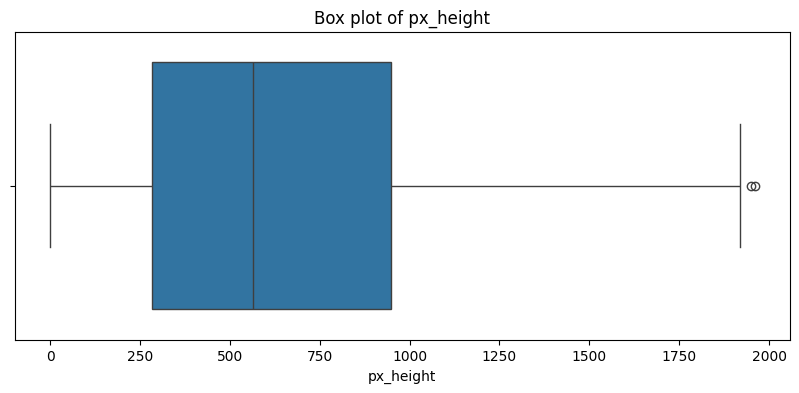

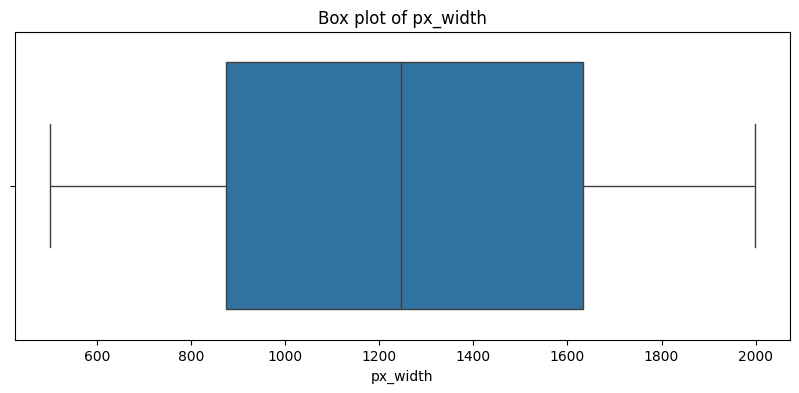

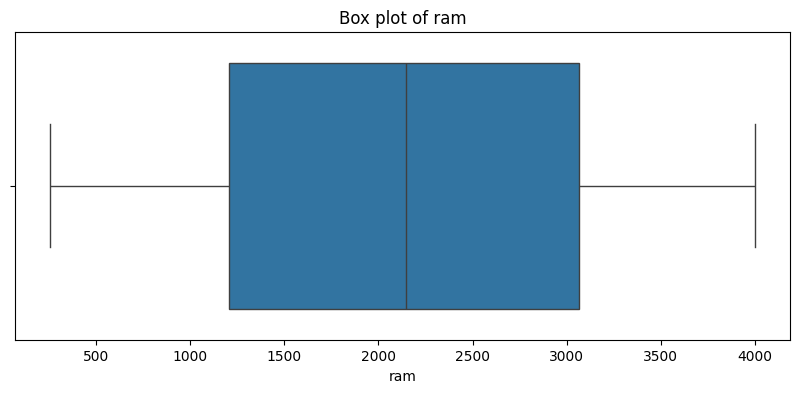

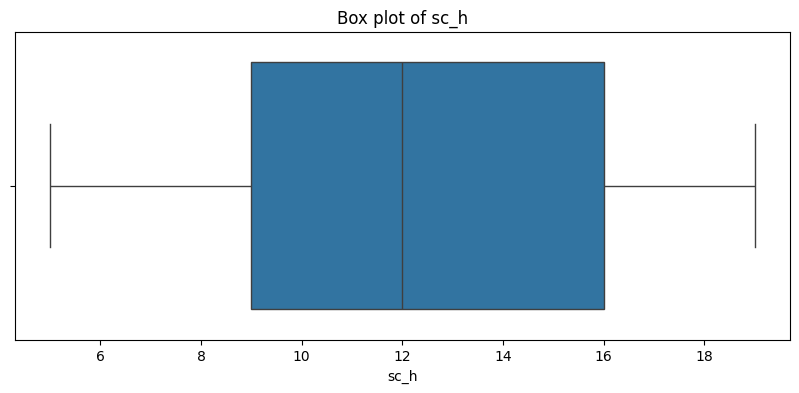

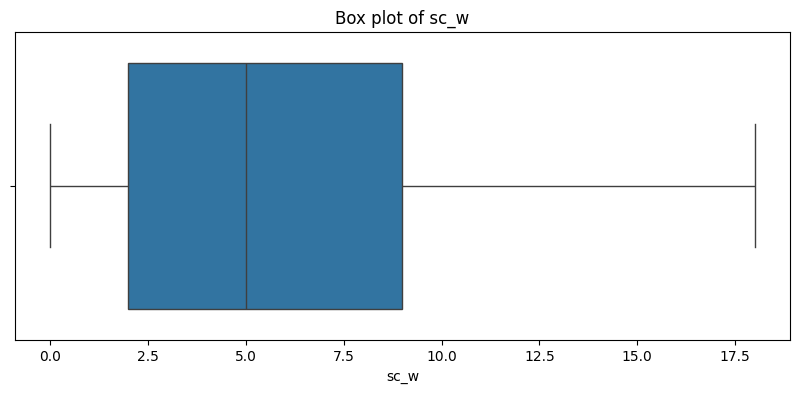

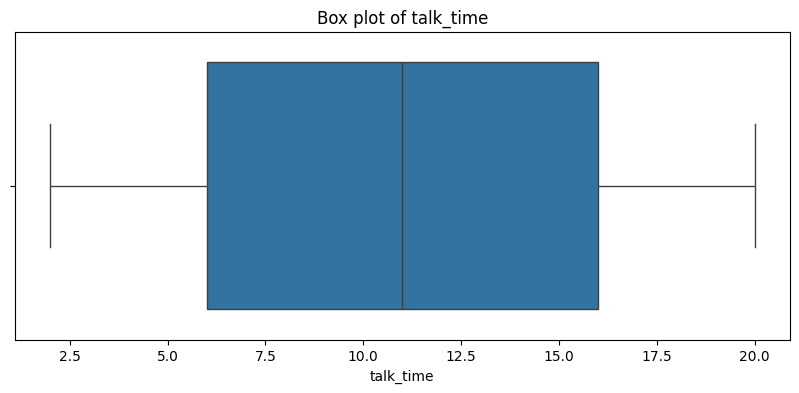

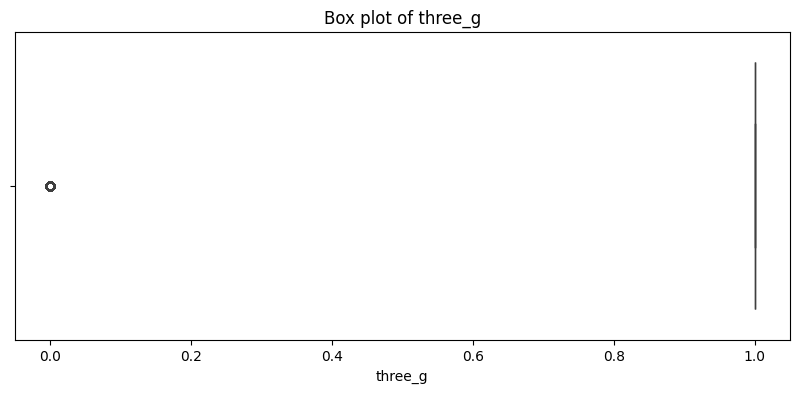

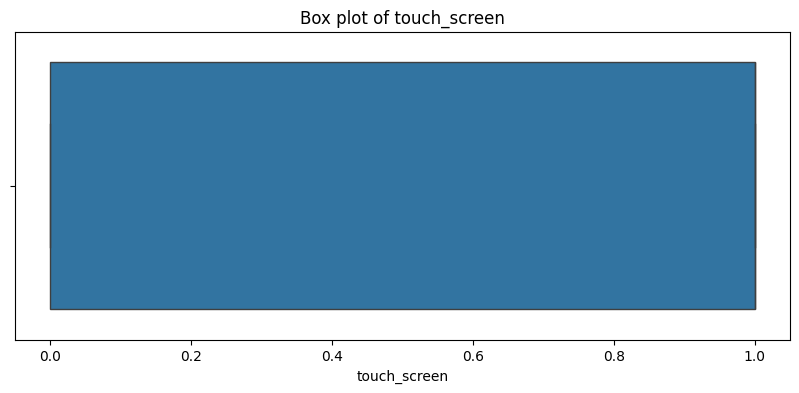

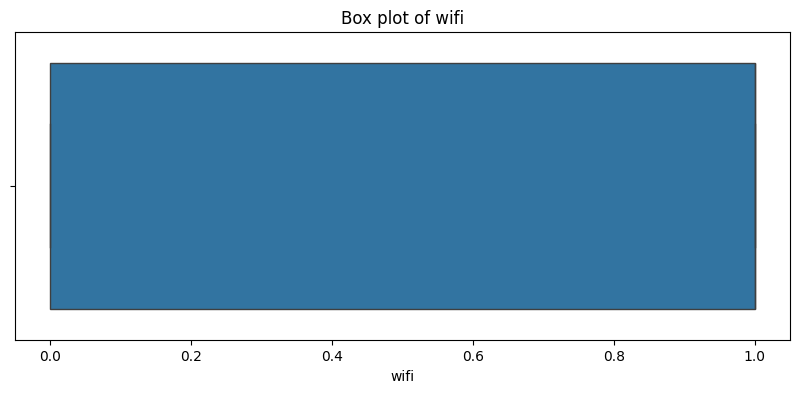

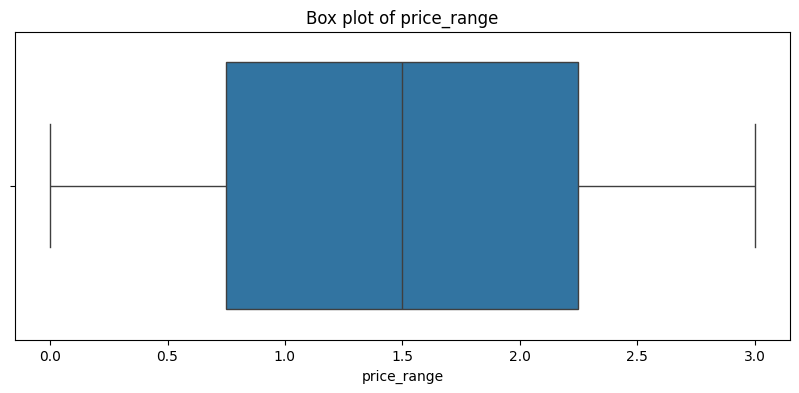

In [39]:
# Detect outliers using box plots
for column in train_data.columns:
    if train_data[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=train_data[column])
        plt.title(f'Box plot of {column}')
        plt.show()

# Identify categorical and continuous variables

In [40]:
categorical_vars = train_data.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
continuous_vars = train_data.select_dtypes(include=['number']).columns.tolist()

print("Categorical Variables:", categorical_vars)
print("Continuous Variables:", continuous_vars)

Categorical Variables: []
Continuous Variables: ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']


In [41]:
# Analyze data types
train_data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

### SELECTING VARIABLES THAT HAVE A HIGH CORRELATION WITH THE TARGET VARIABLE

### Observation : Correlation threshold is set at 0.5 and RAM has the highest value of correlation.

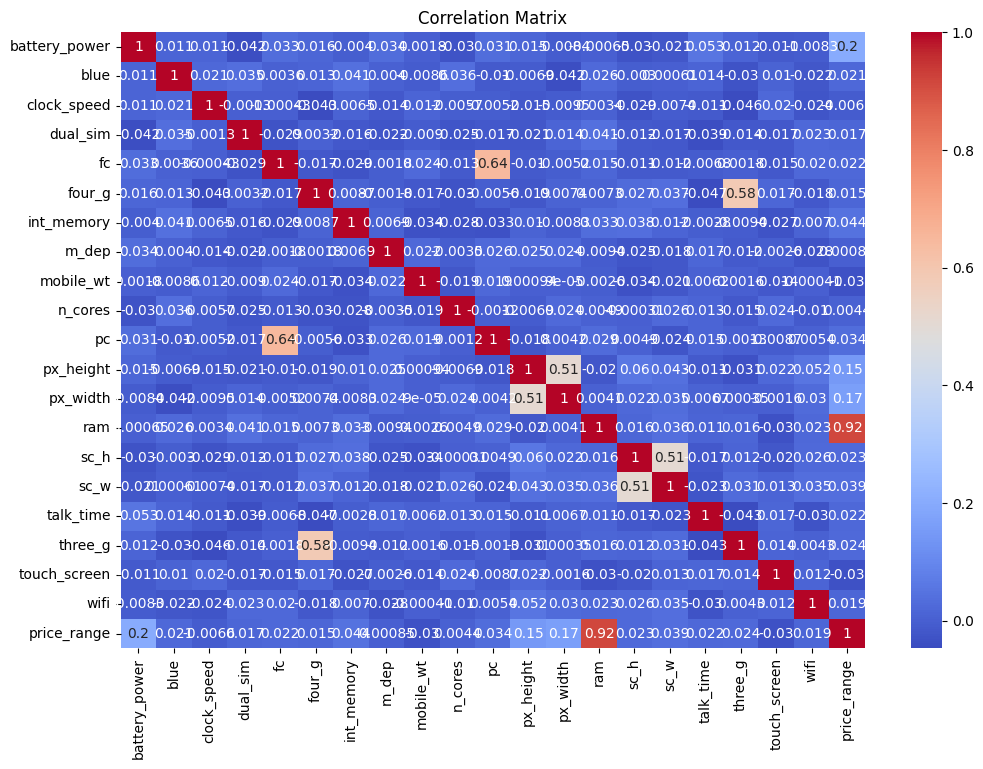

Variables with strong correlations to price_range:
ram    0.917046
Name: price_range, dtype: float64


In [44]:
# Calculate the correlation matrix
corr_matrix = train_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Extract correlations with the target variable
price_corr = corr_matrix['price_range'].drop('price_range')

# Sort the correlations in descending order
price_corr_sorted = price_corr.abs().sort_values(ascending=False)

# Define a threshold for strong correlations
threshold = 0.5

# Filter and display variables with strong correlations
strong_corr_vars = price_corr_sorted[price_corr_sorted > threshold]
print("Variables with strong correlations to price_range:")
print(strong_corr_vars)


In [45]:
# Selecting RAM as the feature
X = train_data[['ram']]
y = train_data['price_range']

In [46]:
# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [48]:
# Train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [49]:
# Evaluate the model
y_pred = model.predict(X_val_scaled)
print(classification_report(y_val, y_pred))
print(f'Accuracy: {accuracy_score(y_val, y_pred):.2f}')

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.56      0.54      0.55        91
           2       0.55      0.58      0.56        92
           3       0.82      0.79      0.81       112

    accuracy                           0.70       400
   macro avg       0.69      0.69      0.69       400
weighted avg       0.70      0.70      0.70       400

Accuracy: 0.70


In [50]:
# Select and scale the RAM feature in the test data
test_ram = test_data[['ram']]
test_ram_scaled = scaler.transform(test_ram)

In [51]:
# Make predictions on the test data
test_predictions = model.predict(test_ram_scaled)

In [52]:
# Save the predictions
predictions_df = pd.DataFrame(test_predictions, columns=['price_range'])
predictions_df.to_csv('test_predictions.csv', index=False)

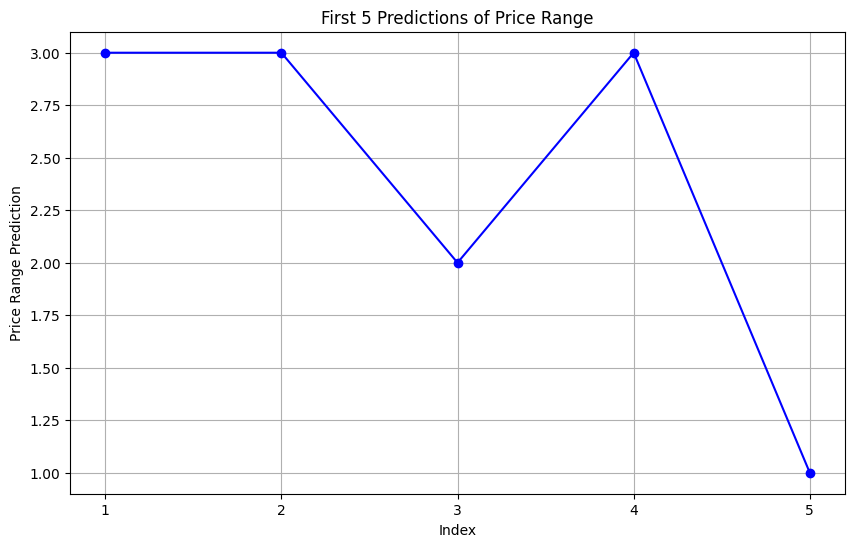

In [54]:
# import pandas as pd
# import matplotlib.pyplot as plt

# Load the predictions CSV file
predictions_df = pd.read_csv('test_predictions.csv')

# Display the head of the predictions DataFrame
predictions_df.head()

# Visualize the first few predictions
plt.figure(figsize=(10, 6))
plt.plot(predictions_df.head(), marker='o', linestyle='-', color='b')
plt.title('First 5 Predictions of Price Range')
plt.xlabel('Index')
plt.ylabel('Price Range Prediction')
plt.xticks(range(5), labels=range(1, 6))
plt.grid(True)
plt.show()


In [57]:
# Load the predictions CSV file
predictions_df = pd.read_csv('test_predictions.csv')

# Adding the predictions as a new column to the test dataset
test_data['price_range'] = predictions_df['price_range']

# Display the head of the updated test DataFrame
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1


In [58]:
# Save the model
joblib.dump(model, 'price_prediction_model.pkl')

['price_prediction_model.pkl']

#### THE END